In [1]:
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
## 한글 폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import platform
print(platform.system())
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

Linux


In [3]:
f = open('./A#1_data/지하철_유무임별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
print(header)
print(np.arange(len(header)))
print('-'*80)
'''
1. 지하철역 이용 인원에 대한 분석 (지하철 유무임별 이용현황)
    1) 유임 승차 비율이 가장 높은 역
    e.g.) 유임 승차 비율 = 유임승차 / (유임승차 + 무임승차)
'''
max_ratio = 0
for row in data:
    for idx in [4,6]: #유임승차, 무임승차
        row[idx] = int(row[idx].replace(',',''))
    if row[6] > 0.:
        tmp_ratio = row[4]/(row[4]+row[6])
        if tmp_ratio > max_ratio:
            max_ratio = tmp_ratio
            max_line_station = row[1] + '-' + row[3]
print('1. 유임 승차 비율이 가장 높은 역')
print("{:s}: {:.2f}".format(max_line_station, max_ratio*100))
f.close()

'''
    2) 승하차 인원이 가장 많은 역 (유임/무임별 승차/하차 각각)
'''
f = open('./A#1_data/지하철_유무임별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
print('-'*80)
max_value = [0]*4
max_line_station = ['']*4
label = ['유임승차','유임하차','무임승차','무임하차']
for row in data:
    for i in range(4,8):
        row[i] = int(row[i].replace(',',''))
        if row[i] > max_value[i-4]:
            max_value[i-4] = row[i]
            max_line_station[i-4] = row[1] + '-' + row[3]
print('2. 승하차 인원이 가장 많은 역 (유임/무임별 승차/하차 각각)')
for i in range(4):
    print("[{:s}] {:s}: {:d}".format(label[i], max_line_station[i],max_value[i]))

'''
    3) 승하차 인원이 가장 많은 4개 역의 유무임 승하차 비율 파이 그래프
'''
f = open('./A#1_data/지하철_유무임별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
print('-'*80)
a = []
b = []
max_value = 0
label = ['유임승차','유임하차','무임승차','무임하차']
color = ['yellowgreen', 'gold', 'lightcoral', 'cyan']
explodes = (0.05, 0, 0, 0)
for row in data:
    tmp_value = 0
    for i in range(4,8):
        row[i] = int(row[i].replace(',',''))
        tmp_value += row[i]
    a.append(tmp_value)
    b.append(row)
b = np.array(b)[np.argsort(a)][-4:]
a = np.sort(a)

print('3. 승하차 인원이 가장 많은 4개 역의 유무임 승하차 비율 파이 그래프')
for i, v in enumerate (a[-4:]):
    print("[{}위] {:s}-{:s}: {:d}".format(4-i, b[i][1], b[i][3], v))

cnt1, cnt2 = 0,0
fig, axs = plt.subplots(2,2,figsize=(10,10))
for i, v in enumerate (a[-4:]):
    if i == 0 or i == 1:
        axs[0, cnt1].pie(np.array(b[i][4:8],dtype=int), explode=explodes, labels=label, colors=color, autopct='%.2f%%', startangle=45,textprops={'fontsize': 14})
        axs[0, cnt1].set_title('{:s}-{:s}'.format(b[i][1], b[i][3]),fontsize=20)
        cnt1+=1
    else:
        axs[1, cnt2].pie(np.array(b[i][4:8],dtype=int), explode=explodes, labels=label, colors=color, autopct='%.2f%%', startangle=45,textprops={'fontsize': 14})
        axs[1, cnt2].set_title('{:s}-{:s}'.format(b[i][1], b[i][3]),fontsize=20)
        cnt2+=1
#     plt.pie(np.array(b[i][4:8],dtype=int), labels=label, autopct='%d%%')
#     plt.
plt.savefig('./A#1_data/save_figure/1-3.png')
plt.show()

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
[0 1 2 3 4 5 6 7]
--------------------------------------------------------------------------------
1. 유임 승차 비율이 가장 높은 역
2호선-한양대: 94.74
--------------------------------------------------------------------------------
2. 승하차 인원이 가장 많은 역 (유임/무임별 승차/하차 각각)
[유임승차] 2호선-강남: 2058680
[유임하차] 2호선-강남: 2036873
[무임승차] 1호선-종로3가: 257671
[무임하차] 1호선-제기동: 252064
--------------------------------------------------------------------------------
3. 승하차 인원이 가장 많은 4개 역의 유무임 승하차 비율 파이 그래프
[4위] 2호선-구로디지털단지: 3172162
[3위] 2호선-신림: 3345113
[2위] 2호선-잠실(송파구청): 3616867
[1위] 2호선-강남: 4381075


In [4]:
# 유임 승차 비율 함수 정의
def ratio(a,b):
    return int(a)/int(a+b)

In [27]:
# df['지하철역'].unique()

array(['서울역', '동묘앞', '시청', '종각', '종로3가', '종로5가', '동대문', '신설동', '제기동',
       '청량리(서울시립대입구)', '을지로입구', '을지로3가', '을지로4가', '동대문역사문화공원(DDP)', '신당',
       '상왕십리', '왕십리(성동구청)', '한양대', '뚝섬', '성수', '건대입구', '구의(광진구청)',
       '강변(동서울터미널)', '잠실나루', '잠실(송파구청)', '잠실새내', '종합운동장', '삼성(무역센터)',
       '선릉', '역삼', '강남', '교대(법원.검찰청)', '서초', '방배', '사당', '낙성대(강감찬)',
       '서울대입구(관악구청)', '봉천', '신림', '신대방', '구로디지털단지', '대림(구로구청)', '신도림',
       '문래', '영등포구청', '당산', '합정', '홍대입구', '신촌', '이대', '아현', '충정로(경기대입구)',
       '용답', '신답', '도림천', '양천구청', '신정네거리', '용두(동대문구청)', '지축', '구파발',
       '연신내', '불광', '녹번', '홍제', '무악재', '독립문', '경복궁(정부서울청사)', '안국', '충무로',
       '동대입구', '약수', '금호', '옥수', '압구정', '신사', '잠원', '고속터미널',
       '남부터미널(예술의전당)', '양재(서초구청)', '매봉', '도곡', '대치', '학여울', '대청', '일원',
       '수서', '가락시장', '경찰병원', '오금', '수유(강북구청)', '미아(서울사이버대학)', '미아사거리',
       '길음', '성신여대입구(돈암)', '한성대입구(삼선교)', '혜화', '명동', '회현(남대문시장)',
       '숙대입구(갈월)', '삼각지', '신용산', '이촌(국립중앙박물관)', '동작(현충원)', '총신대입구(이수)',
       '남태령', '당고개',

In [9]:
## 추가 분석
df = pd.read_csv('./A#1_data/지하철_유무임별_이용현황.csv', encoding='utf-8', thousands=',')
print(df.columns)
print('-'*80)

for st in list(['용두(동대문구청)', '왕십리(성동구청)', '상왕십리', '신답', '마장','행당','응봉','뚝섬','답십리', '용답', '종로3가','제기동']):
    tmp = df[df['지하철역'].isin([st])]
    if len(tmp['호선명'])!=0:
        for idx in tmp['호선명'].tolist():
            t_tmp = tmp[tmp['호선명'].isin([idx])]
    #         print('{:s}-{:s}, {:.2f}'.format(t_tmp['지하철역'].item(),t_tmp['호선명'].item(),ratio(t_tmp['유임승차'],t_tmp['무임승차'])*100))
            print('{:s}-{:s}, {:d}/{:d}'.format(t_tmp['지하철역'].item(),t_tmp['호선명'].item(), int(t_tmp['유임승차']),int(t_tmp['무임승차'])))
    else:
        print('{:s}-{:s}, {:.2f}'.format(t_tmp['지하철역'].item(),t_tmp['호선명'].item(),ratio(t_tmp['유임승차'],t_tmp['무임승차'])*100))

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차'], dtype='object')
--------------------------------------------------------------------------------
용두(동대문구청)-2호선, 42057/20409
왕십리(성동구청)-2호선, 387332/46042
왕십리(성동구청)-경원선, 324010/53006
왕십리(성동구청)-5호선, 103719/19877
상왕십리-2호선, 318775/60936
신답-2호선, 34232/8395
마장-5호선, 114769/33218
행당-5호선, 177503/44671
응봉-경원선, 35930/15100
뚝섬-2호선, 543670/52617
답십리-5호선, 350396/68115
용답-2호선, 57688/16108
종로3가-1호선, 427162/257671
종로3가-3호선, 205640/49864
종로3가-5호선, 263053/77903
제기동-1호선, 224878/234585


--------------------------------------------------------------------------------
1. 오전 7시대 승차 인원수 막대그래프로 시각화


--------------------------------------------------------------------------------
2. 출근 시간대(7~9시) 사람들이 가장 많이 타고 내리는 역은?
2호선-구로디지털단지: 671805명 (출근시간, 승하차 포함)
2호선-신림: 514699명 (출근시간, 승차만)
7호선-가산디지털단지: 535010명 (출근시간, 하차만)
--------------------------------------------------------------------------------
3. 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은?


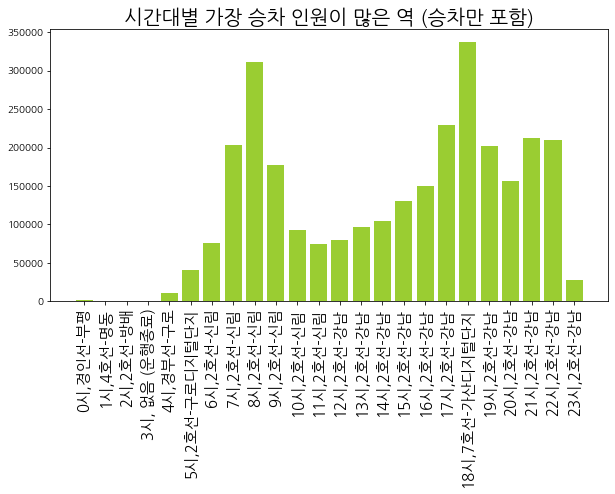

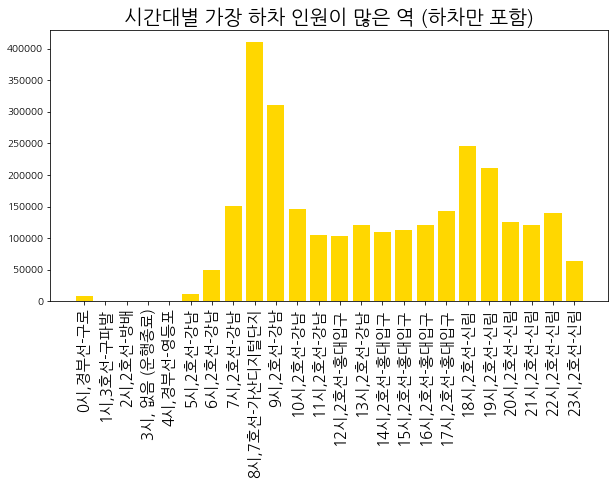

In [10]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

f = open('./A#1_data/지하철_시간대별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
next(data)
print('-'*80)
# print(header)
people = []

for row in data:
#     print(row)
    for idx in range(4,len(row)):
        row[idx] = int(row[idx].replace(",",""))
    people.append(row[10])
# df = pd.read_csv('./A#1_data/지하철_시간대별_이용현황.csv', encoding='utf-8')
# header = df.columns
# print('-'*80)
# # print(header)
# df['07:00:00~07:59:59'] #승차
# # df['Unnamed: 11'] #하차
'''
2. 지하철역 이용 인원에 대한 분석(지하철 시간대별 이용현황)
    1) 오전 7시대 승차 인원수 막대그래프로 시각화
'''
print('1. 오전 7시대 승차 인원수 막대그래프로 시각화')
plt.figure(figsize=(10,5))
plt.title('오전 7시대 승차 인원수',fontsize=20)
plt.bar(range(len(people)),people)
plt.xlabel('역의 종류',fontsize=15)
plt.ylabel('승차 인원수(명)',fontsize=15)
plt.savefig('./A#1_data/save_figure/2-1.png')
plt.show()
f.close()
'''
    2) 출근 시간대(7~9시) 사람들이 가장 많이 타고 내리는 역은?
'''
f = open('./A#1_data/지하철_시간대별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
next(data)
print('-'*80)

# print(header[10:16])
max_value_total = 0
max_station_line_total = ''
range_time = np.arange(10,14) #7시~9시

max_value_in, max_value_out = 0,0
max_station_line_in, max_station_line_out = '', ''

for row in data:
    tmp_values = 0
#     print(row)
    for idx in range(4,len(row)):
        row[idx] = int(row[idx].replace(",",""))
        if np.intersect1d(range_time,idx).shape[0]!=0:
            tmp_values += row[idx]
        else:
            continue
    if tmp_values> max_value_total:
        max_value_total = tmp_values
        max_station_line_total = row[1] + '-' + row[3]
    
    if sum(row[10:13:2]) > max_value_in:
        max_value_in = sum(row[10:13:2])
        max_station_line_in = row[1] + '-' + row[3]
    
    if sum(row[11:14:2]) > max_value_out:
        max_value_out = sum(row[11:14:2])
        max_station_line_out = row[1] + '-' + row[3]
print('2. 출근 시간대(7~9시) 사람들이 가장 많이 타고 내리는 역은?')
print("{:s}: {:d}명 (출근시간, 승하차 포함)".format(max_station_line_total, max_value_total))
print("{:s}: {:d}명 (출근시간, 승차만)".format(max_station_line_in, max_value_in))
print("{:s}: {:d}명 (출근시간, 하차만)".format(max_station_line_out, max_value_out))
f.close()
'''
3) 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은?
'''
f = open('./A#1_data/지하철_시간대별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
next(data)
print('-'*80)

max_values = [-100]*24 #24시간 고려
max_station_line = ['']*24
for row in data:
    for idx in range(4,len(row)):
        row[idx] = int(row[idx].replace(",",""))
        if idx % 2 == 0:
            cur_time = int(header[idx].split(':')[0])
            if row[idx] > max_values[cur_time]:
                max_values[cur_time] = row[idx]
                if row[idx] == 0:
                    max_station_line[cur_time] = '{}시, 없음 (운행종료)'.format(cur_time)
                else:
                    max_station_line[cur_time] = '{}시,{}-{}'.format(cur_time,row[1],row[3])
                
# print(max_values)
# print(max_station_line)
print('3. 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은?')
plt.figure(figsize=(10,5))
plt.title('시간대별 가장 승차 인원이 많은 역 (승차만 포함)',fontsize=20)
plt.bar(range(24),max_values, color='yellowgreen')
plt.xticks(range(24),max_station_line, rotation=90,fontsize=15)
plt.savefig('./A#1_data/save_figure/2-3-1.png')
plt.show()
f.close()
f = open('./A#1_data/지하철_시간대별_이용현황.csv', encoding='utf-8')
data = csv.reader(f)
header = next(data)
next(data)

max_values = [-100]*24 #24시간 고려
max_station_line = ['']*24
for row in data:
    for idx in range(5,len(row)):
        row[idx] = int(row[idx].replace(",",""))
        if idx % 2 == 1:
            cur_time = int(header[idx-1].split(':')[0])
            if row[idx] > max_values[cur_time]:
                max_values[cur_time] = row[idx]
                if row[idx] == 0:
                    max_station_line[cur_time] = '{}시, 없음 (운행종료)'.format(cur_time)
                else:
                    max_station_line[cur_time] = '{}시,{}-{}'.format(cur_time,row[1],row[3])
                
plt.figure(figsize=(10,5))
plt.title('시간대별 가장 하차 인원이 많은 역 (하차만 포함)',fontsize=20)
plt.bar(range(24),max_values,color='gold')
plt.xticks(range(24),max_station_line, rotation=90,fontsize=15)
plt.savefig('./A#1_data/save_figure/2-3-2.png')
plt.show()
f.close()